# Objectives 

* Build a neural net with a result with accuracy bigger than 90%
* We will use TensorFlow ith keras to build our neural net

# Importing the libraries


In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from random import randint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import itertools
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Building the Dataframe

In [53]:
df=pd.read_csv(r'../input/creditcardfraud/creditcard.csv')

# Parsing the Data and analising our naiveness

 At the beginning of tackling this problem i tougth using the whole data because the more data the better right?
 Wrong and i am going to show you why.
 Let's see how much of the data represents a fraudulent purchase

In [54]:
y=df.pop('Class')
df.pop('Time')
x=df.values
y=np.array(y)
counter=(np.count_nonzero(y))
print("Amount of data that is not fraudulent " + str(len(y)-counter))
print("Amount that indeed is fraudulent " + str(counter))
print("Percentage of non fraud " +str(100*(1-(counter/len(y)))))
print("Percentage of fraud "+str(100*((counter/len(y)))))

Amount of data that is not fraudulent 284315
Amount that indeed is fraudulent 492
Percentage of non fraud 99.82725143693798
Percentage of fraud 0.1727485630620034


Now we can see that if our model only predicts non fraudulent transactions it would obtain a 99.82 % of precision and that's not what we want. We want to be able to analize the features and then be able to make assumptions about the nature of the transaction.

How can we solve this problem, the answer randomization. We are going to build a dataset that consists of mostly half fraudulent and half non fraudulent values being the half non fraudulent randomized. 

for this we are going to build the code below.

In [55]:
x_stand=[]
y_stand=[]
for i in range(len(y)):
    if y[i]==1:
        x_stand.append(x[i])
        y_stand.append(1)
for r in range(2000):
    i=randint(0,len(y)-1)
    if y[i]==0:
        y_stand.append(0)
        x_stand.append(x[i])

x_stand=np.array(x_stand)
y_stand=np.array(y_stand)


# Now finally a neural network

We are going to build the architecture of our neural net.

In [56]:
epochs=90
model = keras.Sequential([
    keras.layers.Dense(64,input_shape=(29,),activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_21 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 130       
Total params: 18,626
Trainable params: 18,626
Non-trainable params: 0
_________________________________________________________________
None


Compiling the model

In [57]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico=model.fit(x_stand, y_stand, epochs=epochs,validation_split=0.1,verbose=0)


Apresenting the results and the generalization of the network

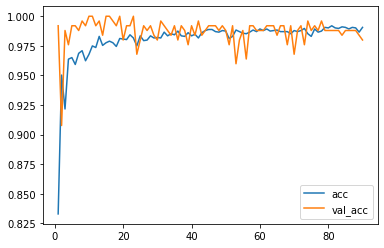

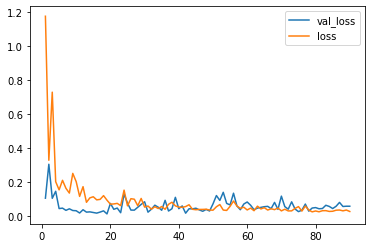

In [58]:
val=historico.history
plt.figure(0)
plt.plot(np.arange(1,len(val['accuracy'])+1),val['accuracy'],label='acc')
plt.plot(np.arange(1,len(val['val_accuracy'])+1),val['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(np.arange(1,len(val['val_loss'])+1),val['val_loss'],label='val_loss')
plt.plot(np.arange(1,len(val['val_loss'])+1),val['loss'],label='loss')
plt.legend()
plt.show()

In [59]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The function above was taken out of the site: https://deeplizard.com/learn/video/km7pxKy4UHU

Confusion matrix, without normalization
[[499   9]
 [ 11 481]]


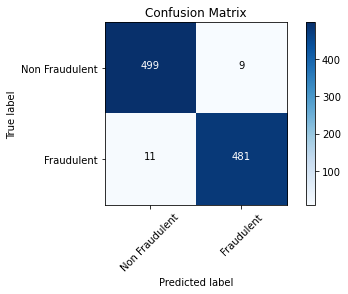

In [60]:
x_stand=[]
y_stand=[]
for i in range(len(y)):
    if y[i]==1:
        x_stand.append(x[i])
        y_stand.append(1)
for r in range(508):
    i=randint(0,len(y)-1)
    if y[i]==0:
        y_stand.append(0)
        x_stand.append(x[i])

x_stand=np.array(x_stand)
y_stand=np.array(y_stand)

comp=model.predict(x_stand)
comp=np.array([np.argmax(u) for u in comp])
cm = confusion_matrix(y_true=y_stand, y_pred=comp)
plot_confusion_matrix(cm=cm,classes=['Non Fraudulent','Fraudulent'],title='Confusion Matrix')
plt.show()

We can now getting this results calculate the TPR(True positive rate) of the random set and 
TNR(True negative rate)

TPR=TP/P=TP/TP+FN

TNR=TN/N=TN/TN+FP

In [61]:
print("TPR (1000 random samples in under-sampling)")
print(cm[0][0]/(cm[0][0]+cm[1][0]))
print("TNR (1000 random samples in under-sampling)")
print(cm[0][1]/(cm[0][1]+cm[1][1]))

TPR (1000 random samples in under-sampling)
0.9784313725490196
TNR (1000 random samples in under-sampling)
0.018367346938775512


Normalized confusion matrix
[[0.98228346 0.01771654]
 [0.02235772 0.97764228]]


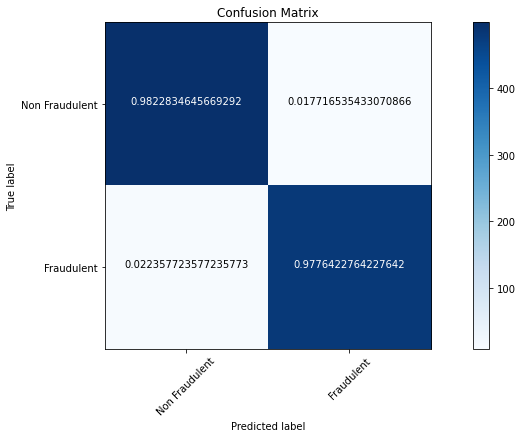

In [62]:
plt.figure(figsize=(12,6))
cm = confusion_matrix(y_true=y_stand, y_pred=comp)
plot_confusion_matrix(cm=cm,classes=['Non Fraudulent','Fraudulent'],title='Confusion Matrix',normalize=True)

Now we can see by the confusion matrix that our model in a dataset with 1000 smaples with close to 50% beeing fraudulent  samples it predicted a precision close to 96% on randomized data.

Now lets try with the whole data

Confusion matrix, without normalization
[[279329   4986]
 [    11    481]]


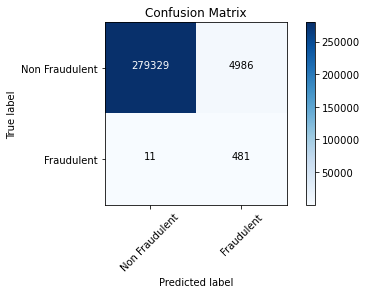

Normalized confusion matrix
[[0.98246311 0.01753689]
 [0.02235772 0.97764228]]


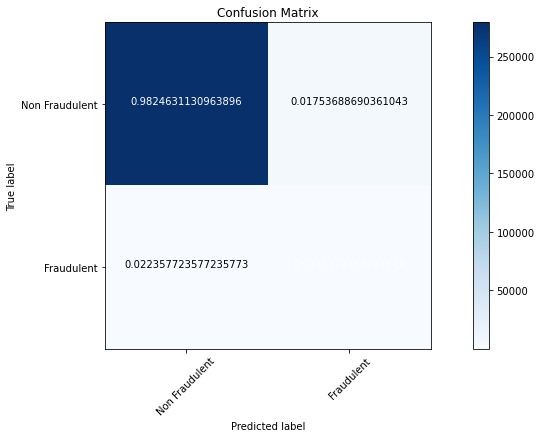

In [63]:
cm = confusion_matrix(y_true=np.array(y), y_pred=np.array([np.argmax(u)for u in model.predict(x)]))
plot_confusion_matrix(cm=cm,classes=['Non Fraudulent','Fraudulent'],title='Confusion Matrix')
plt.show()
plt.figure(figsize=(12,6))
plot_confusion_matrix(cm=cm,classes=['Non Fraudulent','Fraudulent'],title='Confusion Matrix',normalize=True)

In [64]:
print("TPR (All data)")
print(cm[0][0]/(cm[0][0]+cm[1][0]))
print("TNR (All data)")
print(cm[0][1]/(cm[0][1]+cm[1][1]))

TPR (All data)
0.9999606214648815
TNR (All data)
0.9120175599048839


# Trying Oversampling 

In [65]:
from imblearn.over_sampling import RandomOverSampler

In [66]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
counter=(np.count_nonzero(y_over))
print("Amount of data that is not fraudulent " + str(len(y_over)-counter))
print("Amount that indeed is fraudulent " + str(counter))
print("Percentage of non fraud " +str(100*(1-(counter/len(y_over)))))
print("Percentage of fraud "+str(100*((counter/len(y_over)))))

Amount of data that is not fraudulent 284315
Amount that indeed is fraudulent 284315
Percentage of non fraud 50.0
Percentage of fraud 50.0


In [67]:
epochs=20
model = keras.Sequential([
    keras.layers.Dense(64,input_shape=(29,),activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [68]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico=model.fit(x_over, y_over, epochs=epochs,validation_split=0.25,verbose=1)


Epoch 1/20
13328/13328 [==============================] - 21s 2ms/step - loss: 0.0880 - accuracy: 0.9777 - val_loss: 0.0410 - val_accuracy: 0.9864
Epoch 2/20
13328/13328 [==============================] - 21s 2ms/step - loss: 0.0258 - accuracy: 0.9910 - val_loss: 0.0075 - val_accuracy: 0.9978
Epoch 3/20
13328/13328 [==============================] - 22s 2ms/step - loss: 0.0172 - accuracy: 0.9938 - val_loss: 0.0193 - val_accuracy: 0.9922
Epoch 4/20
13328/13328 [==============================] - 21s 2ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0604 - val_accuracy: 0.9941
Epoch 5/20
13328/13328 [==============================] - 21s 2ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0158 - val_accuracy: 0.9980
Epoch 6/20
13328/13328 [==============================] - 21s 2ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0163 - val_accuracy: 0.9978
Epoch 7/20
13328/13328 [==============================] - 23s 2ms/step - loss: 0.0096 - accuracy: 0.9974 - val_loss: 0

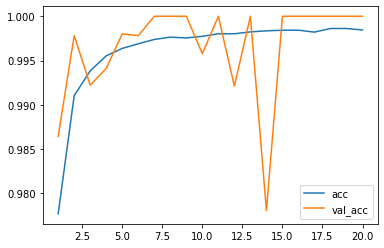

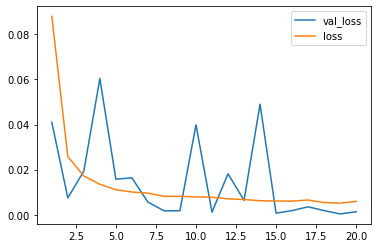

In [69]:
val=historico.history
plt.figure(0)
plt.plot(np.arange(1,len(val['accuracy'])+1),val['accuracy'],label='acc')
plt.plot(np.arange(1,len(val['val_accuracy'])+1),val['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(np.arange(1,len(val['val_loss'])+1),val['val_loss'],label='val_loss')
plt.plot(np.arange(1,len(val['val_loss'])+1),val['loss'],label='loss')
plt.legend()
plt.show()

Confusion matrix, without normalization
[[284009    306]
 [     0 284315]]


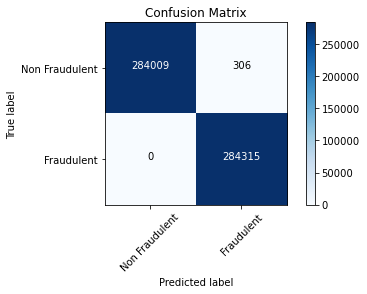

Normalized confusion matrix
[[0.99892373 0.00107627]
 [0.         1.        ]]


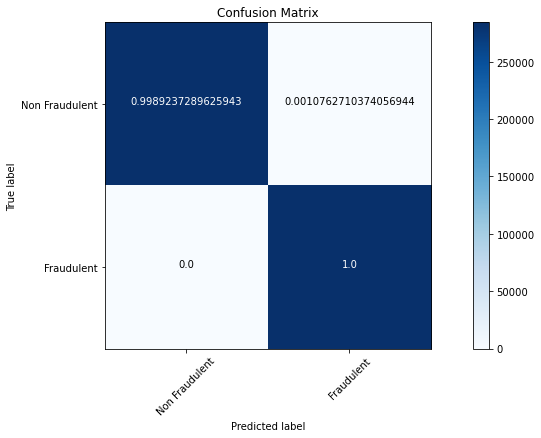

In [70]:
comp=model.predict(x_over)
comp=np.array([np.argmax(u) for u in comp])
cm = confusion_matrix(y_true=y_over, y_pred=comp)
plot_confusion_matrix(cm=cm,classes=['Non Fraudulent','Fraudulent'],title='Confusion Matrix')
plt.show()
plt.figure(figsize=(12,6))
cm = confusion_matrix(y_true=y_over, y_pred=comp)
plot_confusion_matrix(cm=cm,classes=['Non Fraudulent','Fraudulent'],title='Confusion Matrix',normalize=True)

In [71]:
print("TPR (Oversampling)")
print(cm[0][0]/(cm[0][0]+cm[1][0]))
print("TNR (Oversampling)")
print(cm[0][1]/(cm[0][1]+cm[1][1]))

TPR (Oversampling)
1.0
TNR (Oversampling)
0.0010751139234279972


Confusion matrix, without normalization
[[284009    306]
 [     0    492]]


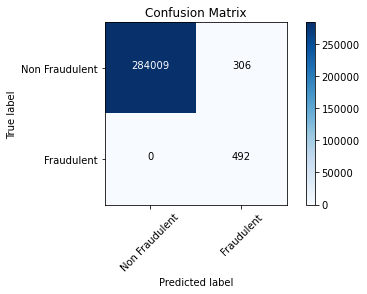

Normalized confusion matrix
[[0.99892373 0.00107627]
 [0.         1.        ]]


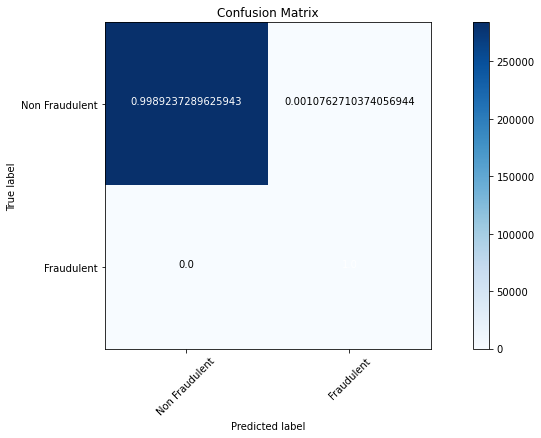

In [72]:
cm = confusion_matrix(y_true=np.array(y), y_pred=np.array([np.argmax(u)for u in model.predict(x)]))
plot_confusion_matrix(cm=cm,classes=['Non Fraudulent','Fraudulent'],title='Confusion Matrix')
plt.show()
plt.figure(figsize=(12,6))
plot_confusion_matrix(cm=cm,classes=['Non Fraudulent','Fraudulent'],title='Confusion Matrix',normalize=True)

In [73]:
print("TPR All data Model oversampling")
print(cm[0][0]/(cm[0][0]+cm[1][0]))
print("TNR All data Model oversampling")
print(cm[0][1]/(cm[0][1]+cm[1][1]))

TPR All data Model oversampling
1.0
TNR All data Model oversampling
0.38345864661654133


# Conclusion 

Both our models got over 90% accuracy but the loss function is not showing such great results mainly on the validation set wich may mean that the model is overfitting and needs improvement  

Looking at accuracy may be not a good way of analysing our results and the main problem with or model maybe the proportion of false positives is not good when the data get scaled.
This problem may be happening because of the strategy of the training wich consists of a huge under-smapling 

When we build a oversampled dataset we can see that the results improve in relation to the FP wich means that maybe oversampling may be the best strategy for this problem. But the results still needs improving.  

The main problem with our model is the prediction of non fraudulent transactions as fraudulent showing that it needs improvement focused on this area. It does get clear that this is the case by looking at the confusion matrix, such of the whole data as of the smaller group of 1000 samples. 
**Thank you for the attention**